In [74]:
import numpy as np
import os 
import re

architectures = {
    'Linear',
    'One layer',
    'Two layers'
}
delays = [True, False]
samplingtime = [1, 10, 100]

d_accs = {}
for arch in architectures:
    for delay in delays:
        for ts in samplingtime:
            # filter by sampling time
            folder = [e for e in os.listdir('../logs/') if f'dt{ts}us' in e]
            folder = [e for e in folder if not 'fulldata' in e]

            # filter by delay (if not linear)
            if arch != 'Linear':
                folder = [e for e in folder if f'{"512d" if delay else "512_"}' in e]

            # filter by architecture
            if arch == 'Linear':
                folder = [e for e in folder if 'linear' in e]
            elif arch == 'One layer':
                folder = [e for e in folder if e.count('-') == 0]
            elif arch == 'Two layers':
                folder = [e for e in folder if e.count('-') == 1]
            
            # fix duplicates for 100us
            if delay and ts == 100 and arch != 'Linear':
                folder = [e for e in folder if '_8_2' in e]

            assert len(folder) == 1, f'found {len(folder)} folders for {arch}, delay={delay}, ts={ts}: {folder}'
            folder = folder[0]

            # load data
            accs = np.array([np.loadtxt(f'../logs/{folder}/fold{i}/accuracy.txt') for i in range(1, 5)])

            d_accs[(arch, delay, ts)] = accs

In [75]:
def get_train_accs(accs):
    return accs[:, :, 0]

In [76]:
print('\multicolumn{2}{|c|}{Model} & 1 $\\mu s$ & 10 $\\mu s$ & 100 $\\mu s$ \\\\')
print('\\hline')
for arch in architectures:
    for delay in delays:
        if arch == 'Linear':
            text = '\multicolumn{2}{|c|}{Linear}'
        else:
            text = '-'.join(['512d' if delay else '512'] * (1 if 'One' in arch else 2))
            text = f'{arch} & {"With delay" if delay else "No delay"}'

        for ts in samplingtime:
            accs = d_accs[(arch, delay, ts)]
            try:
                tr = accs[:,-1,0]
                te = accs[:,-1,1]
            except:
                print(arch, delay, ts, 'failed')
                continue
            text += f' & \\makecell{"{"}{tr.mean():.2%} $\pm$ {tr.std():.2%} \\\\[1pt]'\
                    f'{te.mean():.2%} $\pm$ {te.std():.2%}{"}"}'.replace('%', '\\%')
        text += '\\\\ \n\\hline'
        print(text)

\multicolumn{2}{|c|}{Model} & 1 $\mu s$ & 10 $\mu s$ & 100 $\mu s$ \\
\hline
Two layers & With delay & \makecell{99.74\% $\pm$ 0.12\% \\[1pt]98.29\% $\pm$ 0.41\%} & \makecell{99.47\% $\pm$ 0.03\% \\[1pt]97.44\% $\pm$ 0.58\%} & \makecell{68.00\% $\pm$ 11.34\% \\[1pt]68.98\% $\pm$ 2.43\%}\\ 
\hline
Two layers & No delay & \makecell{99.60\% $\pm$ 0.17\% \\[1pt]98.12\% $\pm$ 0.38\%} & \makecell{99.18\% $\pm$ 0.12\% \\[1pt]97.25\% $\pm$ 0.67\%} & \makecell{51.97\% $\pm$ 3.42\% \\[1pt]50.72\% $\pm$ 15.29\%}\\ 
\hline
One layer & With delay & \makecell{99.43\% $\pm$ 0.11\% \\[1pt]98.45\% $\pm$ 0.34\%} & \makecell{99.37\% $\pm$ 0.11\% \\[1pt]98.13\% $\pm$ 0.29\%} & \makecell{91.51\% $\pm$ 0.76\% \\[1pt]88.99\% $\pm$ 1.56\%}\\ 
\hline
One layer & No delay & \makecell{99.46\% $\pm$ 0.10\% \\[1pt]98.26\% $\pm$ 0.42\%} & \makecell{99.35\% $\pm$ 0.07\% \\[1pt]98.09\% $\pm$ 0.47\%} & \makecell{87.47\% $\pm$ 0.61\% \\[1pt]84.20\% $\pm$ 4.42\%}\\ 
\hline
\multicolumn{2}{|c|}{Linear} & \makecell{98.11\

In [35]:
import numpy as np
import os
import re

folders = [e for e in os.listdir('../logs') if 'fulldata' not in e]
# features: (dt, n_layers, delay)
features = [(int(re.findall(r'dt\d+us', e)[0][2:-2]), 0 if 'linear' in e else e.count('-')+1, '512d' in e) for e in folders]
for feat, folder in sorted(zip(features, folders)):
    try:
        accs = np.array([np.loadtxt(f'../logs/{folder}/fold{i}/accuracy.txt') for i in range(1, 5)])
    except:
        print(feat, folder, 'failed\n')
        continue
    if folder == 'mar19_linear_dt1us':
        continue
    print(feat, folder)
    print(f'Training: {accs[:,-1,0].mean()*100:.2f}\% $\pm$ {accs[:,-1,0].std()*100:.2f}\%')
    print(f'Testing:  {accs[:,-1,1].mean()*100:.2f}\% $\pm$ {accs[:,-1,1].std()*100:.2f}\%\n')

(1, 1, False) mar10_512_dt1us
Training: 99.46\% $\pm$ 0.10\%
Testing:  98.26\% $\pm$ 0.42\%

(1, 1, True) mar8_512d_dt1us
Training: 99.43\% $\pm$ 0.11\%
Testing:  98.45\% $\pm$ 0.34\%

(1, 2, False) mar1_512-512_dt1us
Training: 99.60\% $\pm$ 0.17\%
Testing:  98.12\% $\pm$ 0.38\%

(1, 2, True) feb25_512d-512d_dt1us
Training: 99.74\% $\pm$ 0.12\%
Testing:  98.29\% $\pm$ 0.41\%

(10, 0, False) mar19_linear_dt10us
Training: 97.72\% $\pm$ 0.21\%
Testing:  95.53\% $\pm$ 2.13\%

(10, 1, False) mar9_512_dt10us
Training: 99.35\% $\pm$ 0.07\%
Testing:  98.09\% $\pm$ 0.47\%

(10, 1, True) mar9_512d_dt10us
Training: 99.37\% $\pm$ 0.11\%
Testing:  98.13\% $\pm$ 0.29\%

(10, 2, False) mar9_512-512_dt10us
Training: 99.18\% $\pm$ 0.12\%
Testing:  97.25\% $\pm$ 0.67\%

(10, 2, True) mar9_512d-512d_dt10us
Training: 99.47\% $\pm$ 0.03\%
Testing:  97.44\% $\pm$ 0.58\%

(100, 0, False) mar19_linear_dt100us
Training: 86.73\% $\pm$ 0.67\%
Testing:  83.08\% $\pm$ 2.12\%

(100, 1, False) mar19_512_dt100us
Trai

/tmp/ipykernel_10063/1782459989.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  accs = np.array([np.loadtxt(f'../logs/{folder}/fold{i}/accuracy.txt') for i in range(1, 5)])


In [ ]:
def plot_image_ax(ax, evts):
    img = tonic.transforms.ToImage(sensor_size=(32, 24, 2,))(evts)
    N = 100
    img[0,0,0] = N
    img[1,0,0] = 0
    img[1,0,1] = N
    img[0,0,1] = 0
    ax.imshow(img[1]-img[0])#, cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    # ax.grid(False)

In [ ]:
def plot_event_count_ax(ax, evts, n_bins=1_000):
    up_data = np.histogram(evts[evts['p'] == 1]['t'], bins=n_bins)
    down_data = np.histogram(evts[evts['p'] == 0]['t'], bins=n_bins)
    ax.bar(up_data[1][:-1], up_data[0], width=up_data[1][1]-up_data[1][0])
    ax.bar(down_data[1][:-1], -1*down_data[0], width=down_data[1][1]-down_data[1][0])
    # ax.grid()

In [32]:
import matplotlib.pyplot as plt
import scienceplots
from matplotlib.ticker import FuncFormatter
plt.style.use(['science', 'grid'])

def plot_acc_loss(folder, title=''):
    fig, axs = plt.subplots(ncols=2, nrows=2, sharey='row', sharex=True, figsize=(11, 4), dpi=300)
    fig.suptitle(f'Spiking MLP{title}', fontsize=13)
    #  - {os.path.basename(folder)}'
    axs[0][0].set_title('training performance')
    axs[0][1].set_title('testing performance')

    for fold_idx in range(1, 5):
        acc = np.loadtxt(os.path.join(folder, f'fold{fold_idx}', 'accuracy.txt'))
        lss = np.loadtxt(os.path.join(folder, f'fold{fold_idx}', 'loss.txt'))
        axs[0][0].plot(acc[:,0], label=f'fold {fold_idx}')
        axs[0][1].plot(acc[:,1], label=f'fold {fold_idx}' if fold_idx == 1 else None)
        axs[1][0].plot(lss[:,0], label=f'fold {fold_idx}')
        axs[1][1].plot(lss[:,1], label=f'fold {fold_idx}')
    # axs[0][1].hlines(0.9605, 0, 50, label='linear model on frames', color='gray', linestyle='--')
    # axs[0][1].hlines(0.9751, 0, 50, label='MLP on frames', color='black', linestyle='--')
    axs[0][0].set_ylabel('Accuracy (in \%)')
    axs[0][0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    axs[1][0].set_ylabel('Loss')
    # axs[0][1].legend(loc='lower right', ncol=2)
    axs[0][0].legend(loc='lower right', ncol=4)
    plt.tight_layout()
    # plt.show()
    plt.savefig('snn_plot_512d_1us.pdf', dpi=300)

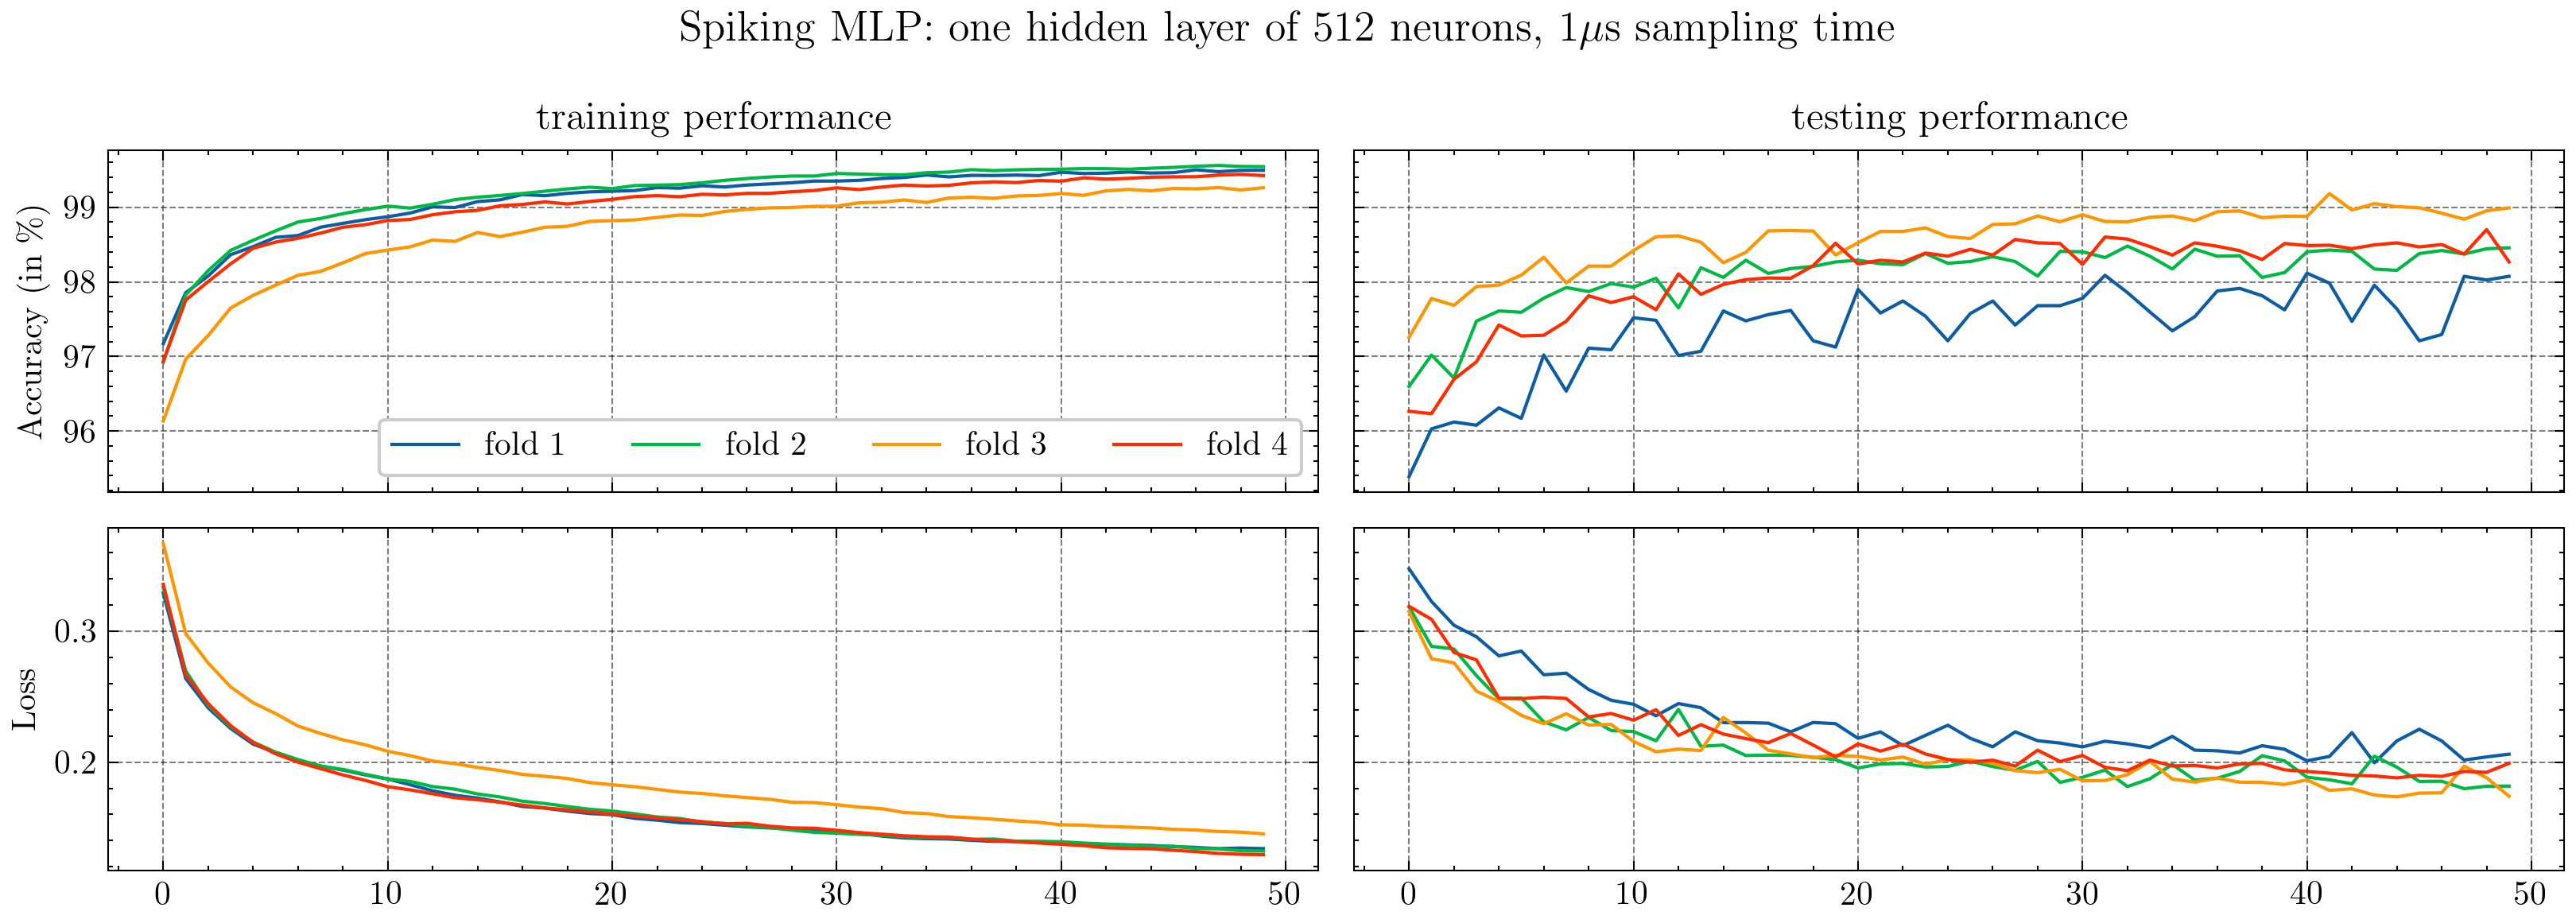

In [33]:
folder = 'mar8_512d_dt1us'
folder = os.path.join('../logs', folder)
plot_acc_loss(folder, title=': one hidden layer of 512 neurons, 1$\mu$s sampling time')

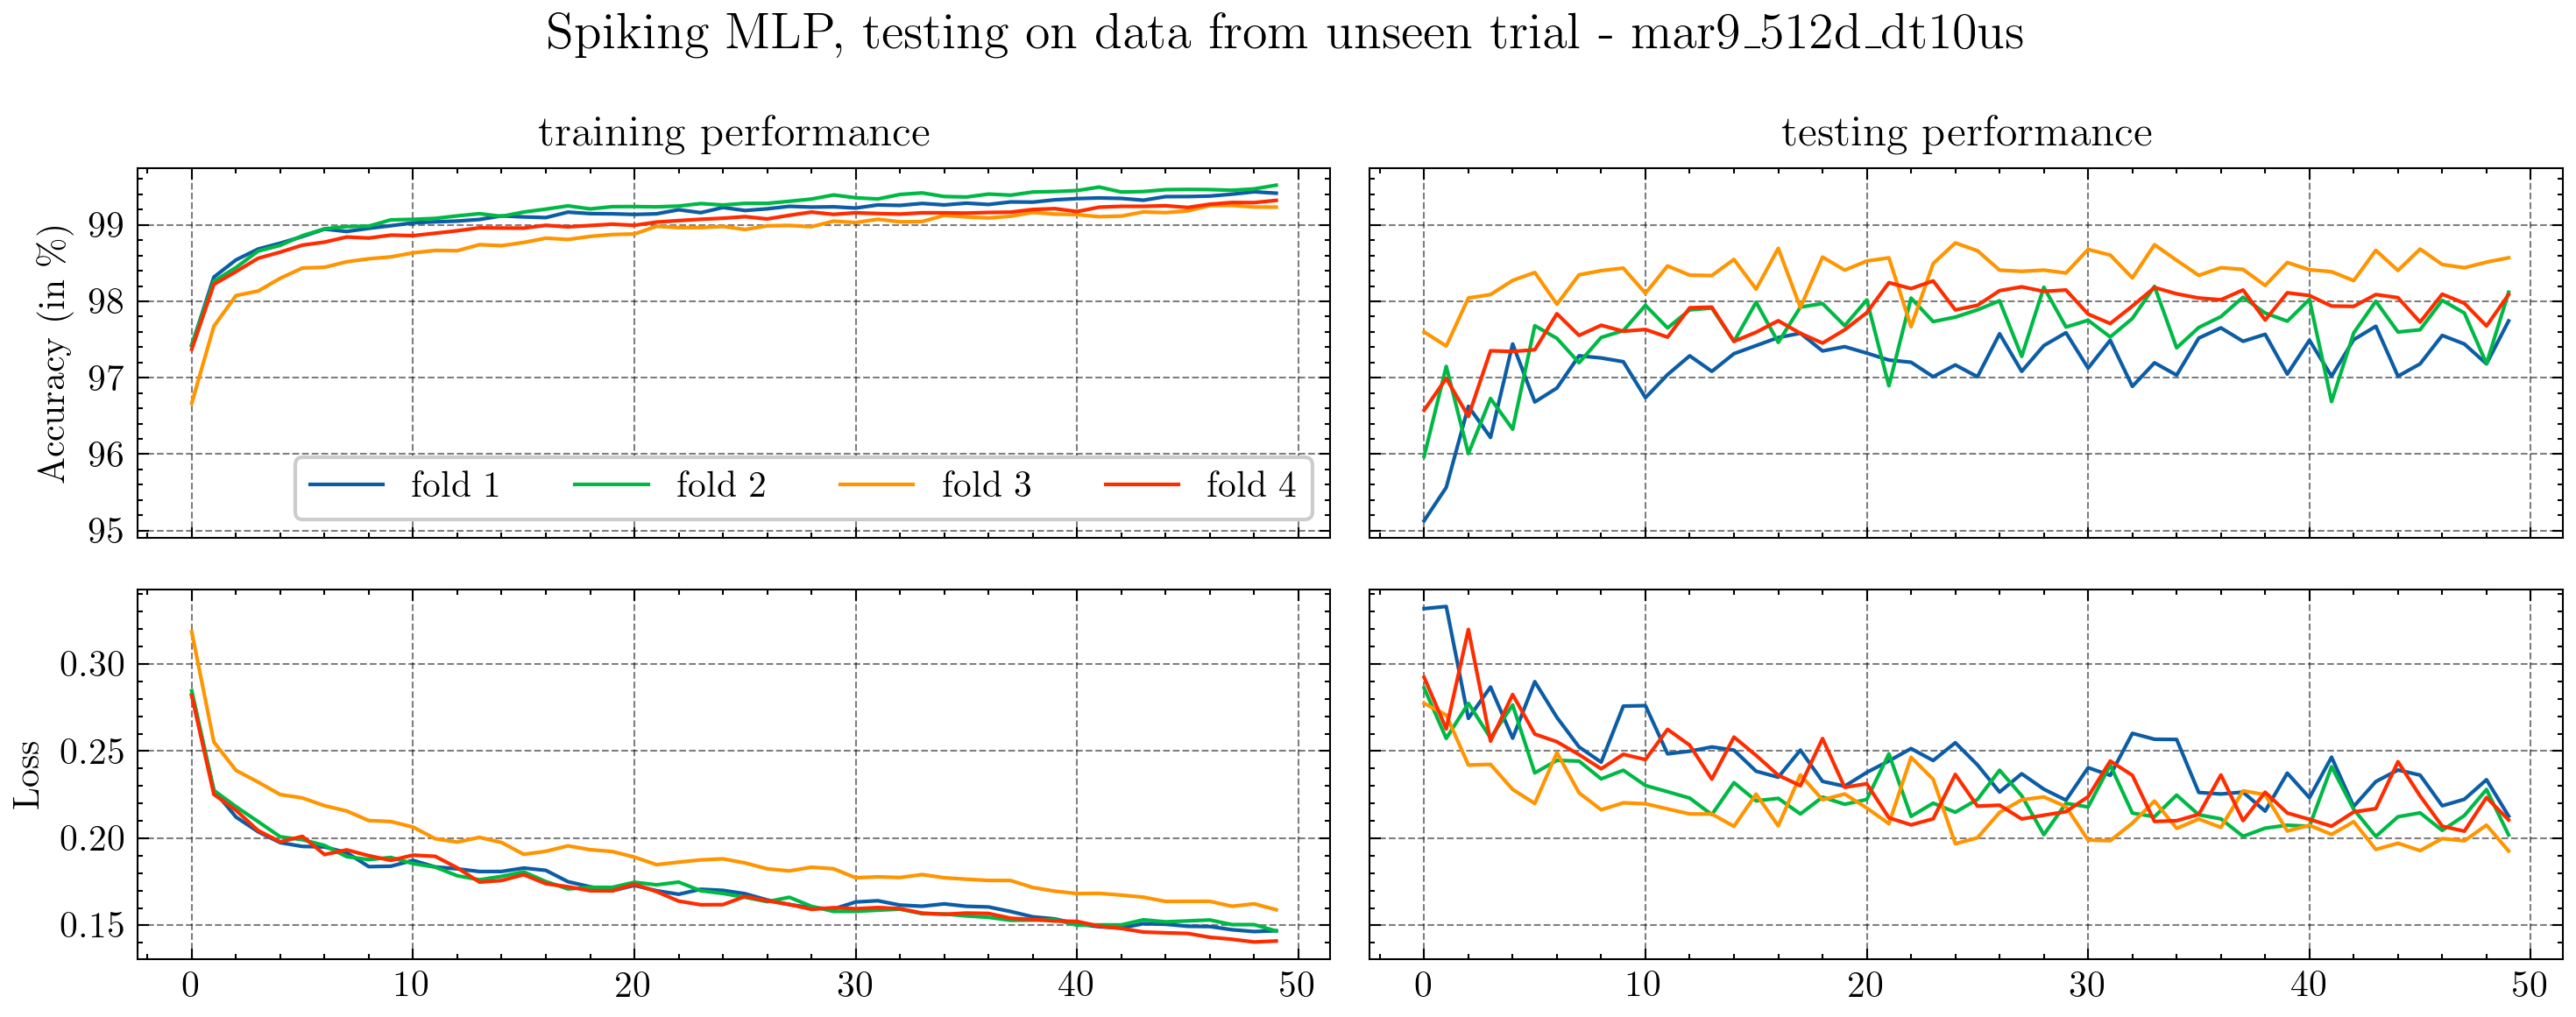

In [13]:
folder = folders[2]
folder = os.path.join('../logs', folder)
plot_acc_loss(folder)

In [16]:
import numpy as np
import os

folders = [f'../logs/trained_fold{i}_nodelay_mar1' for i in range(1, 5)]
accs = np.array([np.loadtxt(os.path.join(folder, 'accuracy.txt'))[-1] for folder in folders])
print(f'Training: {accs[:,0].mean()*100:.2f}\% $\pm$ {accs[:,0].std()*100:.2f}\%')
print(f'Testing:  {accs[:,1].mean()*100:.2f}\% $\pm$ {accs[:,1].std()*100:.2f}\%')

Training: 99.60\% $\pm$ 0.17\%
Testing:  98.12\% $\pm$ 0.38\%


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scienceplots
from matplotlib.ticker import FuncFormatter

plt.style.use(['science', 'grid'])

In [2]:
folder = '../trained_feb24/'

def get_stats(folder):
    acc = np.loadtxt(os.path.join(folder, 'accuracy.txt'))
    lss = np.loadtxt(os.path.join(folder, 'loss.txt'))
    grads = None
    if os.path.exists(os.path.join(folder, 'gradFlow.txt')):
        grads = np.loadtxt(os.path.join(folder, 'gradFlow.txt'), delimiter=',')
    return acc, lss, grads

In [5]:
folders = {
    '../logs/trained_feb24/': 'trained on full data, temporal split',
    '../logs/trained_feb24_randsplit/': 'trained on full data, random split',
    '../logs/trained_fold1_feb24/': 'trained per-trial, testing on fold 1',
    '../logs/trained_fold2_feb24/': 'trained per-trial, testing on fold 2',
    '../logs/trained_fold3_feb24/': 'trained per-trial, testing on fold 3',
    '../logs/trained_fold4_feb24/': 'trained per-trial, testing on fold 4'
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


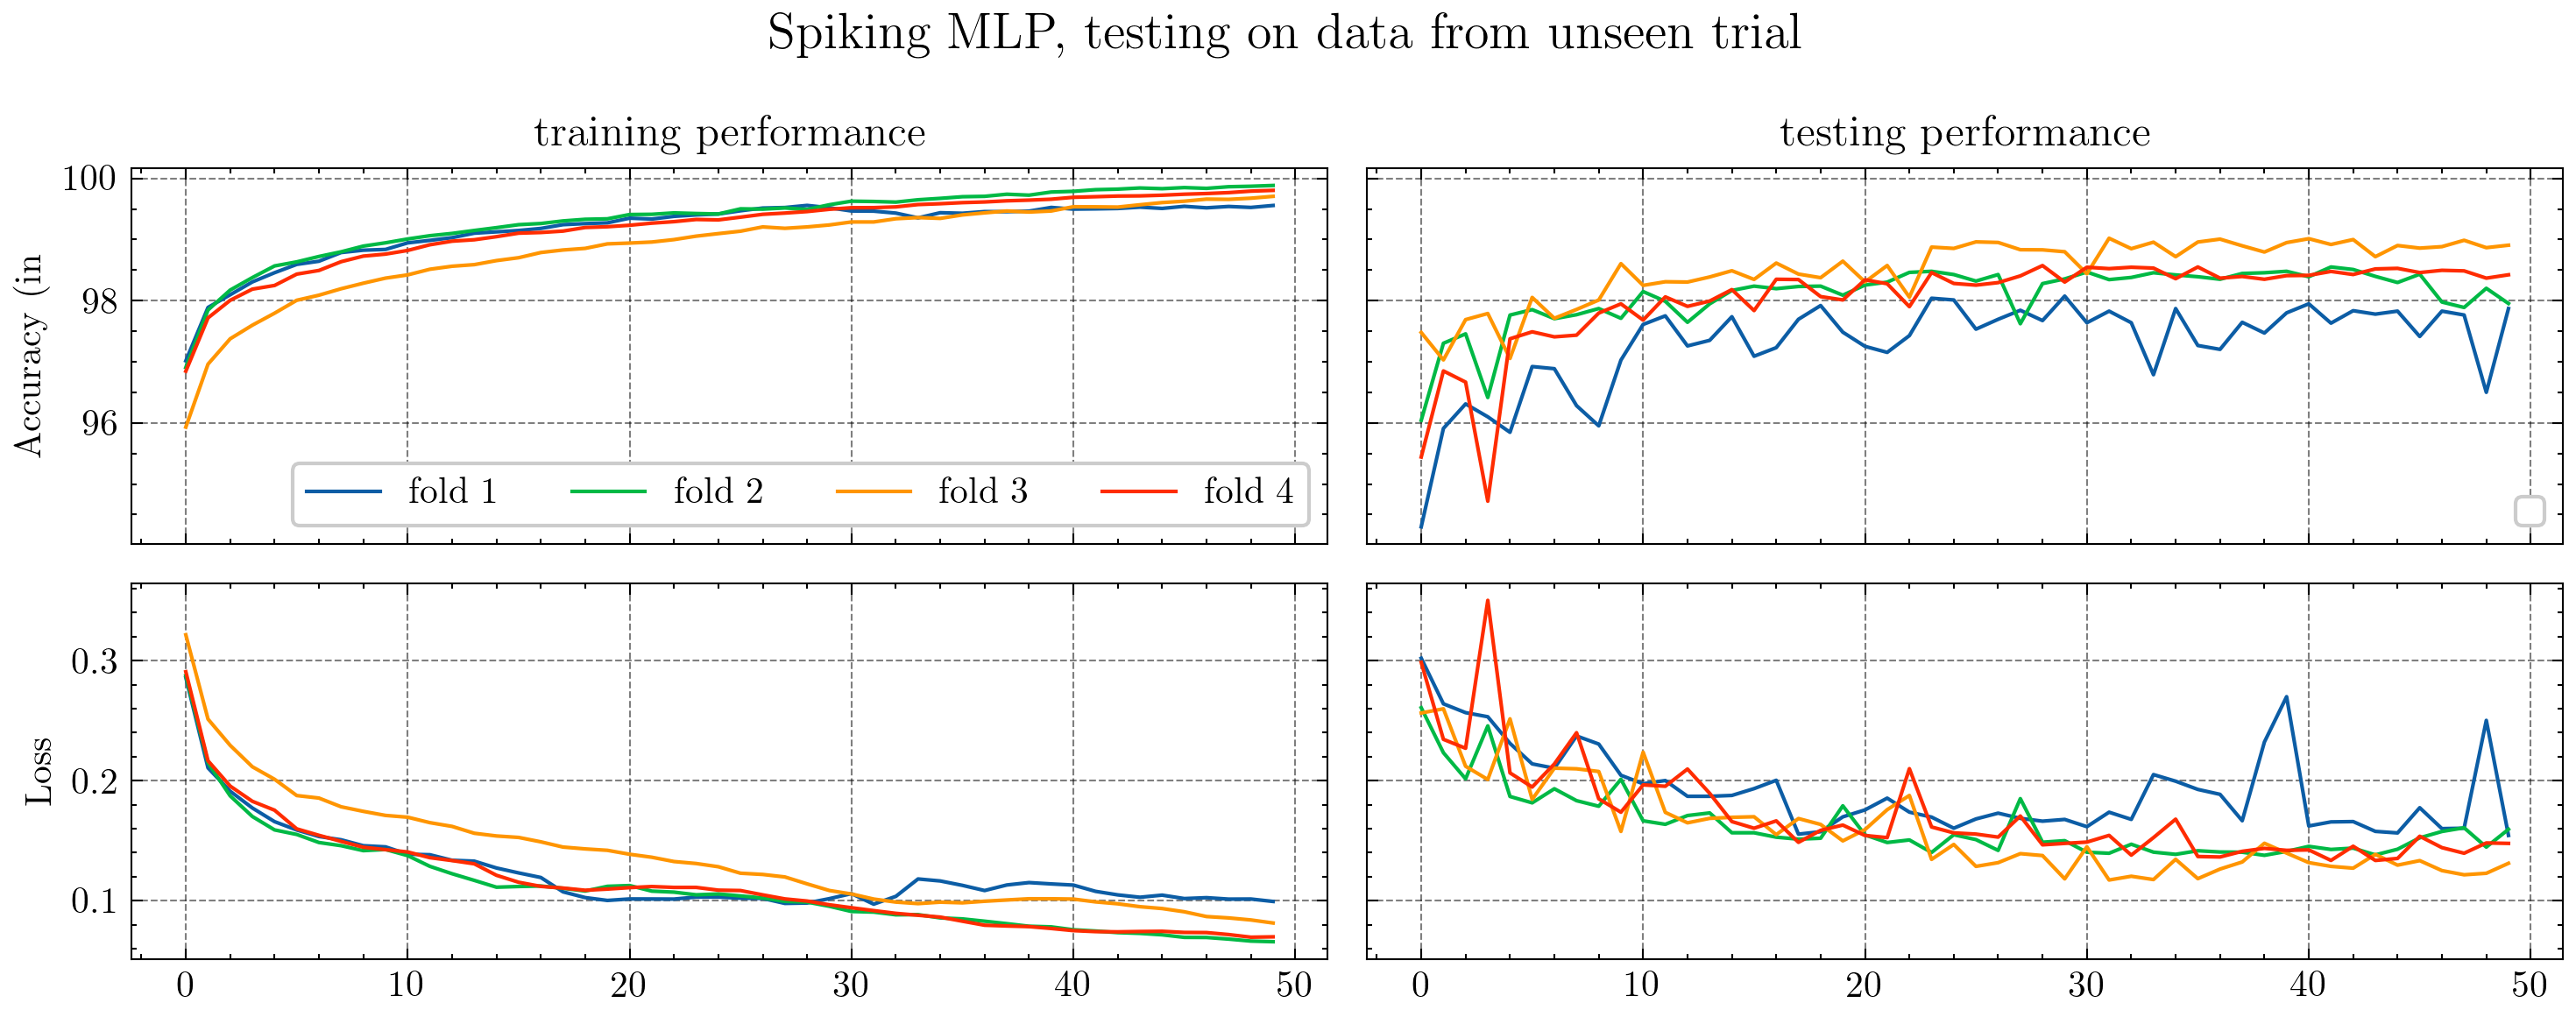

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharey='row', sharex=True, figsize=(10, 4), dpi=300)
fig.suptitle('Spiking MLP, testing on data from unseen trial', fontsize=14)
axs[0][0].set_title('training performance')
axs[0][1].set_title('testing performance')
for folder, title in [(k,v) for (k,v) in folders.items() if 'fold' in k]:
    fold_idx = folder.split('_')[-2][-1]
    acc, lss, grads = get_stats(folder)
    axs[0][0].plot(acc[:,0], label=f'fold {fold_idx}')
    axs[0][1].plot(acc[:,1], label=f'fold {fold_idx}' if fold_idx == 1 else None)
    axs[1][0].plot(lss[:,0], label=f'fold {fold_idx}')
    axs[1][1].plot(lss[:,1], label=f'fold {fold_idx}')
# axs[0][1].hlines(0.9605, 0, 50, label='linear model on frames', color='gray', linestyle='--')
# axs[0][1].hlines(0.9751, 0, 50, label='MLP on frames', color='black', linestyle='--')
axs[0][0].set_ylabel('Accuracy (in %)')
axs[0][0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axs[1][0].set_ylabel('Loss')
axs[0][1].legend(loc='lower right', ncol=2)
axs[0][0].legend(loc='lower right', ncol=4)
plt.tight_layout()
plt.savefig('cvpr_paper.png', dpi=300)

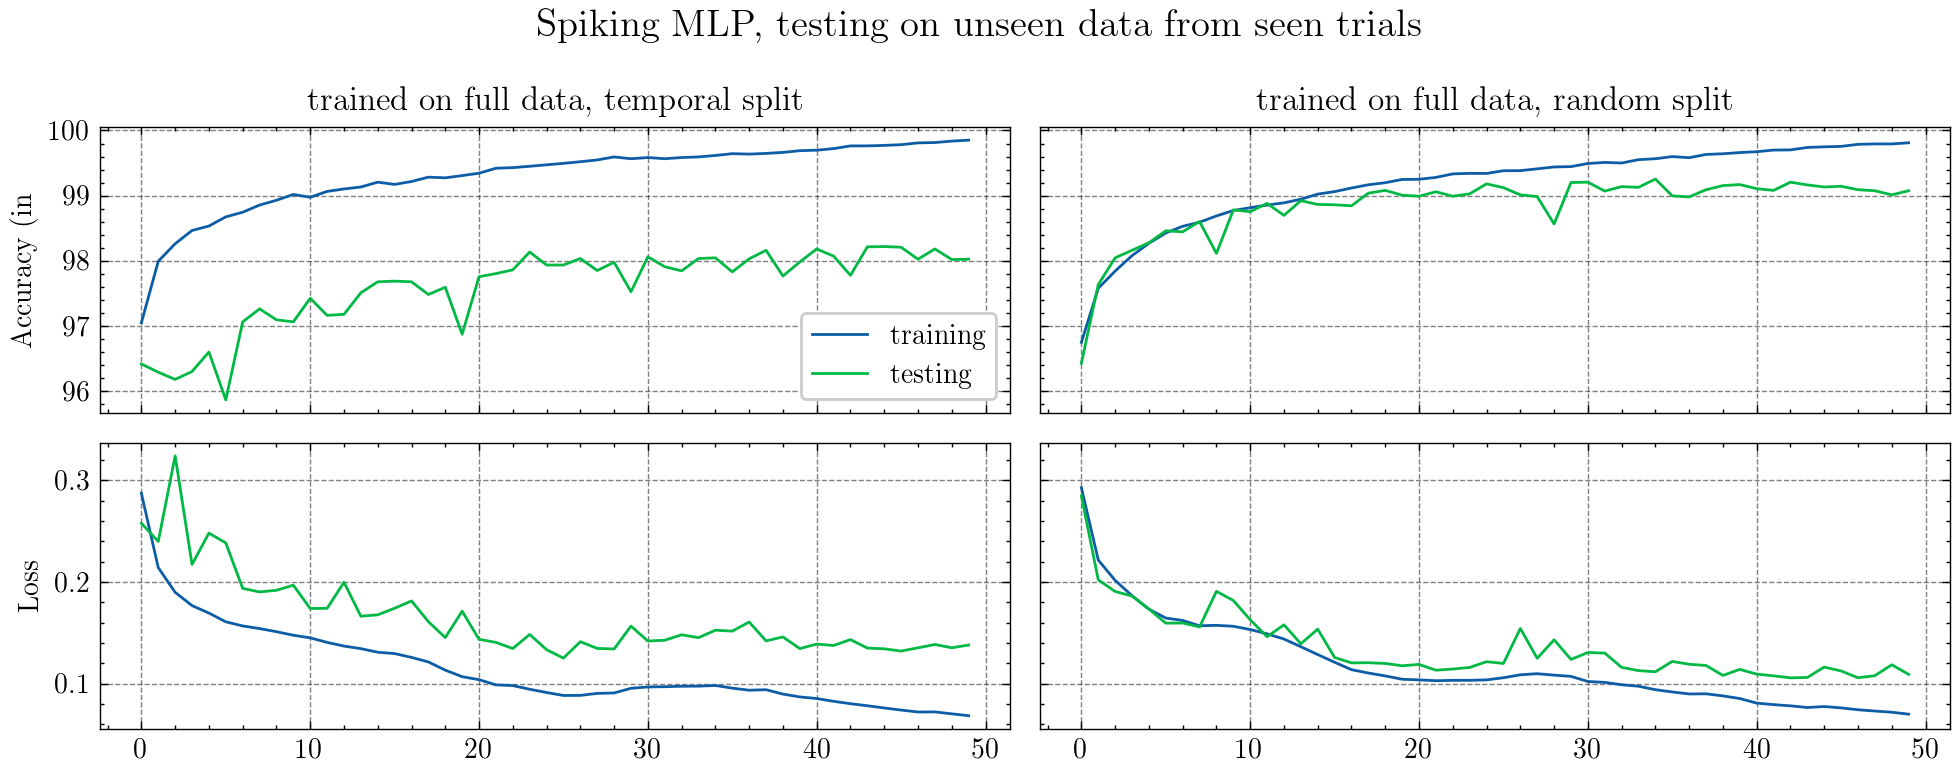

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharey='row', sharex=True, figsize=(10, 4), dpi=200)
fig.suptitle('Spiking MLP, testing on unseen data from seen trials', fontsize=14)
for idx, (folder, title) in enumerate(folders.items()):
    if 'fold' in folder:
        continue
    acc, lss, grads = get_stats(folder)
    axs[0][idx].set_title(title)
    axs[0][idx].plot(acc, label=['training', 'testing'])
    axs[1][idx].plot(lss, label=['training', 'testing'])
axs[0][0].set_ylabel('Accuracy (in %)')
axs[1][0].set_ylabel('Loss')
axs[0][0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# axs[0][0].legend(loc='lower right', ncol=2, fancybox=True, shadow=True)
axs[0][0].legend(loc='lower right')
# axs[0][1].legend(loc='center', bbox_to_anchor=(-0.3, 0.5), ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

In [13]:
# best performances
final_folds_test = []
final_folds_train = []
for idx, (folder, title) in enumerate(folders.items()):
    acc, lss, grads = get_stats(folder)
    print(f'{title}')
    print(f'final: {acc[-1,0]:.2%} training, {acc[-1,1]:.2%} testing')
    final_folds_train.append(acc[-1,0])
    final_folds_test.append(acc[-1,1])
    print(f'best:  {acc[:,0].max():.2%} training, {acc[:,1].max():.2%} testing')
    print()
final_folds_test = np.array(final_folds_test)
final_folds_train = np.array(final_folds_train)
print(f'average: {np.mean(final_folds_train):.2%} training, {np.mean(final_folds_test):.2%} testing')

trained on full data, temporal split
final: 99.85% training, 98.02% testing
best:  99.85% training, 98.22% testing

trained on full data, random split
final: 99.81% training, 99.08% testing
best:  99.81% training, 99.25% testing

trained per-trial, testing on fold 1
final: 99.56% training, 97.87% testing
best:  99.56% training, 98.07% testing

trained per-trial, testing on fold 2
final: 99.88% training, 97.95% testing
best:  99.88% training, 98.55% testing

trained per-trial, testing on fold 3
final: 99.71% training, 98.91% testing
best:  99.71% training, 99.02% testing

trained per-trial, testing on fold 4
final: 99.80% training, 98.42% testing
best:  99.80% training, 98.57% testing

average: 99.77% training, 98.38% testing
